In [114]:
import pandas as pd
import numpy as np
from sklearn import tree
import jieba
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
dataset = pd.read_csv("train.csv",encoding="utf-8",sep=",",delimiter="\t")
dataset.head()

,target,text,stance
0,开放二胎,刚回家几天就迫不及待的赶到了小舅家，看着乖巧懂事的表妹和可爱的小表弟，心情格外舒畅！这个画面...,FAVOR
1,俄罗斯在叙利亚的反恐行动,俄罗斯就是流氓,AGAINST
2,春节放鞭炮,#春节放鞭炮#【中央气象台首次发布烟花爆竹燃放气象指数】明天就是除夕了，年味越发浓郁。今早，...,AGAINST
3,IphoneSE,iPhoneSE貌似摄像头不外突了，普天同庆,FAVOR
4,春节放鞭炮,千万人口级城市北京，原住民在庆祝第一大节日春节，大家伙都心照不宣的想到：别再给伤痕累累的家乡...,AGAINST


In [116]:
dataset["stance"] = dataset["stance"].map({"FAVOR":0,"AGAINST":1,"NONE":2})

In [117]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 3 columns):
target    2400 non-null object
text      2400 non-null object
stance    2400 non-null int64
dtypes: int64(1), object(2)
memory usage: 56.4+ KB


In [118]:
X= dataset.drop("stance",axis=1)
Y = dataset["stance"]

In [119]:
Y.unique()

array([0, 1, 2], dtype=int64)

In [120]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=1,test_size =0.2)

In [121]:
x_train.head()

,target,text
2199,IphoneSE,之前各种预测的iphoneSE真的出现了 只不过预测的都是SE采用6s的外观 没想到用的还是...
1070,IphoneSE,对于买大还是买小，就跟吃饭用大碗还是小碗一样，自己觉得够就行呗。
1264,春节放鞭炮,#晨报早读#【今天过小年 咱不放或少放点鞭炮行不？】今年春节不放鞭炮，这是最近微博上热议的话...
1938,开放二胎,"中国开放二胎、""吸金储油""、传统产业转型升级等战略，以应对真正面临的三大长期风险:人口、能源..."
1737,开放二胎,#姚晨怀二胎# 昨天，大姚@姚晨 在电影发布会上宣布积极响应二胎政策，11月份就可以给土豆添...


In [122]:
def stopwordslist():
    stopwords = [line.strip() for line in open('cn_stopwords.txt',encoding='UTF-8').readlines()]
    stopwords.extend([line.strip() for line in open('scu_stopwords.txt',encoding='UTF-8').readlines()])
    stopwords.extend([line.strip() for line in open('baidu_stopwords.txt',encoding='UTF-8').readlines()])
    stopwords.extend([line.strip() for line in open('hit_stopwords.txt',encoding='UTF-8').readlines()])
    return stopwords
        
def seg_depart(sentence):
     # 对文档中的每一行进行中文分词
    sentence_depart = jieba.cut(sentence.strip())
     # 创建一个停用词列表
    stopwords = stopwordslist()
    # 输出结果为outstr
    outstr = ''
   # 去停用词
    for word in sentence_depart:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr        
              
        

In [123]:
def fenci(train_data):
    words_df = train_data.apply(lambda x:' '.join(jieba.cut(x)))
    return words_df

In [124]:
x_train["cut"] = x_train['text'].apply(seg_depart)
x_train.head()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,target,text,cut
2199,IphoneSE,之前各种预测的iphoneSE真的出现了 只不过预测的都是SE采用6s的外观 没想到用的还是...,预测 iphoneSE 真的 只不过 预测 SE 采用 6s 外观 没想到 5s …...
1070,IphoneSE,对于买大还是买小，就跟吃饭用大碗还是小碗一样，自己觉得够就行呗。,买大 买 吃饭 大碗 碗 够 行
1264,春节放鞭炮,#晨报早读#【今天过小年 咱不放或少放点鞭炮行不？】今年春节不放鞭炮，这是最近微博上热议的话...,晨报 早读 过小年 咱不放 少放点 鞭炮 行 今年春节 放鞭炮 这是 微博上 热议 话题...
1938,开放二胎,"中国开放二胎、""吸金储油""、传统产业转型升级等战略，以应对真正面临的三大长期风险:人口、能源...",中国 开放 二胎 吸金 储油 传统产业 转型 升级 战略 应对 面临 三大 长期 风险 人口...
1737,开放二胎,#姚晨怀二胎# 昨天，大姚@姚晨 在电影发布会上宣布积极响应二胎政策，11月份就可以给土豆添...,姚晨怀 二胎 昨天 大姚 姚晨 电影 发布会 积极响应 二胎 政策 11 月份 土豆...


In [125]:
vectorizer = CountVectorizer(stop_words=stopwordslist(), max_features=5000)
vectorizer.fit(x_train["cut"])

D:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'lex', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5000, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['$', '0', '1', '2', '3', '4', '5', '6', '7', '8',
                            '9', '?', '_', '“', '”', '、', '。', '《', '》', '一',
                            '一些', '一何', '一切', '一则', '一方面', '一旦', '一来', '一样',
                            '一般', '一转眼', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [126]:
vectorizer.transform(x_train["cut"] ) + vectorizer.transform(x_train['target'])

<1920x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 25581 stored elements in Compressed Sparse Row format>

In [127]:
vectorizer.transform(x_train['text']).shape

(1920, 5000)

In [128]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(0,fit_prior=False)
#模型训练
classifier.fit(vectorizer.transform(x_train["cut"]) + vectorizer.transform(fenci(x_train['target'])), y_train)

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


MultinomialNB(alpha=0, class_prior=None, fit_prior=False)

In [129]:
x_test["cut"] = x_test["text"].apply(seg_depart)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 朴素贝叶斯

In [80]:
for i in np.arange(0.0,1.1,0.1):
    classifier = MultinomialNB(i,fit_prior=False)
#模型训练
    classifier.fit(vectorizer.transform(x_train["cut"] ) + vectorizer.transform(fenci(x_train['target'])), y_train)
    scores = classifier.score(vectorizer.transform(x_test["cut"])+vectorizer.transform(fenci(x_test['target'])), y_test)
    print("alph is {0},score is {1}".format(i,scores))

D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


alph is 0.0,score is 0.55
alph is 0.1,score is 0.5770833333333333
alph is 0.2,score is 0.5833333333333334
alph is 0.30000000000000004,score is 0.5833333333333334
alph is 0.4,score is 0.5854166666666667
alph is 0.5,score is 0.5875
alph is 0.6000000000000001,score is 0.5895833333333333
alph is 0.7000000000000001,score is 0.5854166666666667
alph is 0.8,score is 0.58125
alph is 0.9,score is 0.5854166666666667
alph is 1.0,score is 0.5854166666666667


In [81]:
for i in np.arange(0.0,1.1,0.1):
    classifier = MultinomialNB(i,fit_prior=True)
#模型训练
    classifier.fit(vectorizer.transform(x_train["cut"] ) + vectorizer.transform(fenci(x_train['target'])), y_train)
    scores = classifier.score(vectorizer.transform(x_test["cut"])+vectorizer.transform(fenci(x_test['target'])), y_test)
    print("alph is {0},score is {1}".format(i,scores))

alph is 0.0,score is 0.55


D:\anaconda\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


alph is 0.1,score is 0.5833333333333334
alph is 0.2,score is 0.5833333333333334
alph is 0.30000000000000004,score is 0.5833333333333334
alph is 0.4,score is 0.5833333333333334
alph is 0.5,score is 0.5791666666666667
alph is 0.6000000000000001,score is 0.5854166666666667
alph is 0.7000000000000001,score is 0.5833333333333334
alph is 0.8,score is 0.5875
alph is 0.9,score is 0.58125
alph is 1.0,score is 0.5791666666666667


In [82]:
classifier = MultinomialNB(1,fit_prior=False)
#模型训练
classifier.fit(vectorizer.transform(x_train["cut"] ) + vectorizer.transform(fenci(x_train['target'])), y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=False)

In [83]:
predicted = classifier.predict(vectorizer.transform(x_test["cut"] ) + vectorizer.transform(fenci(x_test['target'])))

In [84]:
test = pd.read_csv("test.csv",delimiter="\t")

In [85]:
test

,target,text
0,IphoneSE,讲真，对iphoneSE很心动，但是又很期待iphone7，心塞
1,春节放鞭炮,传统春节来临传统的拜神，放鞭炮，烧纸，热闹呢
2,俄罗斯在叙利亚的反恐行动,俄罗斯在战争状态下的紧急动员能力，这不是土耳其可以低估的。
3,深圳禁摩限电,珠海要是有这么高强度，市区就不会有那么多摩托车横冲直撞了
4,深圳禁摩限电,#深圳禁摩限电# 早该整了，快递开电车，真把马路当成他们家开的一样...不过他们工作压力大，...
...,...,...
595,春节放鞭炮,发表了博文 《小年印象》 - 不知不觉，小年到了，俗称“祭灶”，即希望灶神“上天言好事，下地...
596,俄罗斯在叙利亚的反恐行动,这个土耳其一沾上他美爹的光就强硬起来了，不想想自己是个啥德行？自不量力！
597,春节放鞭炮,今年上海过节放鞭炮的现象大为减少，空气质量也比较好，这次政府管制得很好，不断发劝告短消息给市...
598,IphoneSE,喜欢小屏幕的苹果，现在还是4s，好吧，其实还有是因为穷


In [86]:
test["cut"] = test["text"].apply(seg_depart)

In [87]:
test_input  = vectorizer.transform(test["cut"] ) + vectorizer.transform(fenci(test['target']))

In [89]:
#['FAVOR', 'AGAINST', 'NONE']

In [90]:
import csv
with open('key.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f, dialect='excel')
    for index,res in enumerate(classifier.predict(test_input)):
        fin = ""
        if res == 0:
            fin = "FAVOR"
        if res == 1:
            fin = 'AGAINST'
        if res == 2:
            fin = 'NONE'
        writer.writerow([index,fin])





    
    

SyntaxError: invalid syntax (<ipython-input-90-b662d37adaea>, line 9)

In [91]:
mcm  = confusion_matrix(y_test, predicted,
                            labels=[0, 1, 2])

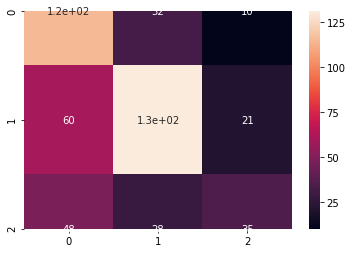

In [92]:
sns.heatmap(mcm,annot=True)

### knn


In [93]:


X_train = vectorizer.transform(x_train["cut"] ) + vectorizer.transform(fenci(x_train['target']))
X_test = vectorizer.transform(x_test["cut"] ) + vectorizer.transform(fenci(x_test['target']))

In [94]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train, y_train)
    y_predict = knc.predict(X_test)
    score = np.mean(y_predict == y_test)
    print("n_neighbours is {0}, score is {1}".format(i,score))

n_neighbours is 1, score is 0.44166666666666665
n_neighbours is 2, score is 0.45
n_neighbours is 3, score is 0.4166666666666667
n_neighbours is 4, score is 0.46458333333333335
n_neighbours is 5, score is 0.45208333333333334
n_neighbours is 6, score is 0.4354166666666667
n_neighbours is 7, score is 0.4375
n_neighbours is 8, score is 0.4666666666666667
n_neighbours is 9, score is 0.45416666666666666


In [95]:
y_predict

array([0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2,
       2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0,
       1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 1, 1, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0,
       1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1,

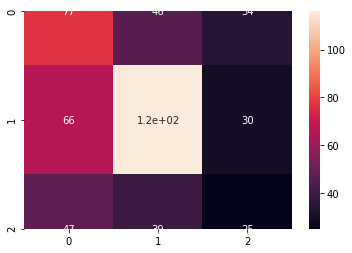

In [96]:
mcm  = confusion_matrix(y_test, y_predict,
                            labels=[0,1,2])
sns.heatmap(mcm,annot=True)

### 逻辑回归

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(fit_prior=False),
    LogisticRegression(random_state=0),
]

In [111]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))


In [112]:
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/module

In [113]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.510417
1,RandomForestClassifier,1,0.536458
2,RandomForestClassifier,2,0.523438
3,RandomForestClassifier,3,0.515625
4,RandomForestClassifier,4,0.523438
5,LinearSVC,0,0.500000
6,LinearSVC,1,0.510417
7,LinearSVC,2,0.549479
8,LinearSVC,3,0.536458
9,LinearSVC,4,0.513021


In [102]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

D:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [103]:
score = np.mean(y_pred == y_test)

In [104]:
score

0.5604166666666667

In [105]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)


In [136]:


X_train = vectorizer.transform(x_train["cut"] ) + vectorizer.transform(fenci(x_train['target']))
X_test = vectorizer.transform(x_test["cut"] ) + vectorizer.transform(fenci(x_test['target']))

In [137]:
from xgboost import XGBClassifier

my_model = XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train)
predictions = my_model.predict(X_test)

np.mean(predictions == y_test)

0.5666666666666667

Mean Absolute Error : 0.559948269960781


0.0